# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** M. Farrel Danendra Rachim
- **Email:** 13521048@std.stei.itb.ac.id
- **ID Dicoding:** just_loud_stuff_2

## Menentukan Pertanyaan Bisnis

- Pada bulan apa banyak pengguna casual dan register mencapai puncaknya?
- Pada musim apa banyak pengguna casual dan register mencapai puncaknya?
- Bagaimana pengelompokkan berdasarkan banyak total pengguna per hari?

## Import Semua Packages/Library yang Digunakan

Untuk analisis data bike sharing ini kita akan mengimpor beberapa library seperti pandas dan numpy untuk mengumpulkan dan mengolah data, serta matplotlib dan seaborn yang berfungsi untuk memvisualisasikan data. Library warnings berguna untuk menghilangkan warning message saat kita menjalankan code-code.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

Terdapat dua buah data yang akan dibaca: Penghitungan bike sharing per hari (bicycle_df_day) dan per jam (bicycle_df_hour)

In [ ]:
#  Pembacaan data
bicycle_df_day = pd.read_csv("day.csv")
bicycle_df_hour = pd.read_csv("hour.csv")

Berikut adalah preview data dari kedua dataframe tersebu serta banyak baris dan kolom dari kedua data:

In [ ]:
# Preview data bike sharing harian
bicycle_df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Preview data bike sharing per jam
bicycle_df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dalam dataset bike sharing per jam terdapat kolom tambahan yakni kolom 'hr' yang menggambarkan rentang jam dari jam 0 sampai 23 (lihat Readme.txt dalam direktori data untuk penjelasan lebih lengkap mengenai data).


### Assessing Data

#### Menilai tabel `bicycle_df_day`

Berikut adalah kode untuk mengecek nilai baris, kolom, serta tipe data tiap atribut.

In [ ]:
bicycle_df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berikut adalah kode untuk mengecek apakah ada missing value dalam setiap kolom, dan jika ada, berapa banyaknya.

In [ ]:
bicycle_df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Berikut adalah kode untuk mengecek banyak nilai duplikat dalam data.

In [ ]:
print("Jumlah duplikasi: ", bicycle_df_day.duplicated().sum())

Jumlah duplikasi:  0


Berikut adalah kode untuk menampilkan statistika dasar setiap atribut.

In [ ]:
bicycle_df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berikut adalah kode untuk mengecek outlier. Kita akan menggunakan boxplot untuk melihat apakah ada data kontinu (temp, atemp, hum, windspeed) yang berada di luar ambang IQR.

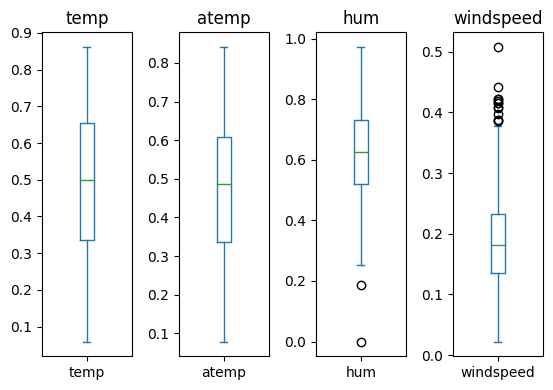

In [ ]:
ratio_data = ['temp', 'atemp', 'hum', 'windspeed']

# Create the figure and axes with the exact number of required subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(7,4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns to plot
for i, data in enumerate(ratio_data):
    # Create a boxplot in the corresponding subplot
    bicycle_df_day[data].plot(kind='box', ax=axes[i])
    axes[i].set_title(data)

# Hide the unused subplot
axes[len(ratio_data)].set_visible(False)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# membuat fungsi cek outlier.
def cek_outlier_day(nama_kolom, batas):
  Q1 = np.percentile(bicycle_df_day[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(bicycle_df_day[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(bicycle_df_day[nama_kolom] >= (Q3 + 1.5 * IQR))
  elif batas == 'lower_bound':
      bound = np.where(bicycle_df_day[nama_kolom] <= (Q1 - 1.5 * IQR))
  return list(bound[0])

In [ ]:
# Jumlah outliers kolom temp
upper_temp = cek_outlier_day('temp','upper_bound')
lower_temp = cek_outlier_day('temp','lower_bound')
print(f"Jumlah total outlier kolom temp : {len(upper_temp) + len(lower_temp)}")
# Jumlah outliers kolom atemp
upper_atemp = cek_outlier_day('atemp','upper_bound')
lower_atemp = cek_outlier_day('atemp','lower_bound')
print(f"Jumlah total outlier kolom atemp : {len(upper_atemp) + len(lower_atemp)}")
# Jumlah outliers kolom hum
upper_hum = cek_outlier_day('hum','upper_bound')
lower_hum = cek_outlier_day('hum','lower_bound')
print(f"Jumlah total outlier kolom hum : {len(upper_hum) + len(lower_hum)}")
# Jumlah outliers kolom windspeed
upper_windspeed   = cek_outlier_day('windspeed','upper_bound')
lower_windspeed   = cek_outlier_day('windspeed','lower_bound')
print(f"Jumlah total outlier kolom windspeed : {len(upper_windspeed) + len(lower_windspeed)}")

Jumlah total outlier kolom temp : 0
Jumlah total outlier kolom atemp : 0
Jumlah total outlier kolom hum : 2
Jumlah total outlier kolom windspeed : 13


#### Menilai tabel `bicycle_df_hour`



Berikut adalah kode untuk mengecek nilai baris, kolom, serta tipe data tiap atribut.

In [ ]:
bicycle_df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berikut adalah kode untuk mengecek apakah ada missing value dalam setiap kolom, dan jika ada, berapa banyaknya.

In [ ]:
bicycle_df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Berikut adalah kode untuk mengecek banyak nilai duplikat dalam data.

In [ ]:
print("Jumlah duplikasi: ", bicycle_df_hour.duplicated().sum())

Jumlah duplikasi:  0


Berikut adalah kode untuk menampilkan statistika dasar setiap atribut.

In [ ]:
bicycle_df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berikut adalah kode untuk mengecek outlier. Kita akan menggunakan boxplot untuk melihat apakah ada data kontinu (temp, atemp, hum, windspeed) yang berada di luar ambang IQR.

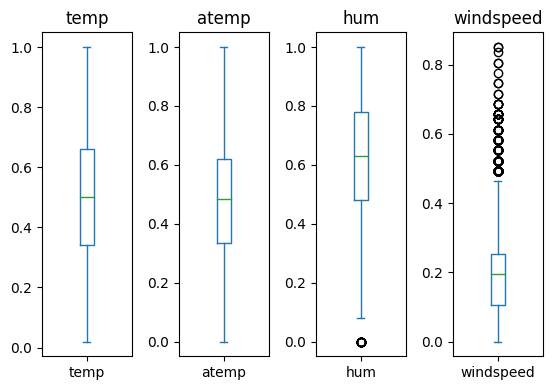

In [ ]:
ratio_data = ['temp', 'atemp', 'hum', 'windspeed']

# Create the figure and axes with the exact number of required subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(7,4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns to plot
for i, data in enumerate(ratio_data):
    # Create a boxplot in the corresponding subplot
    bicycle_df_hour[data].plot(kind='box', ax=axes[i])
    axes[i].set_title(data)

# Hide the unused subplot
axes[len(ratio_data)].set_visible(False)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# membuat fungsi cek outlier.
def cek_outlier_hour(nama_kolom, batas):
  Q1 = np.percentile(bicycle_df_hour[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(bicycle_df_hour[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(bicycle_df_hour[nama_kolom] >= (Q3 + 1.5 * IQR))
  elif batas == 'lower_bound':
      bound = np.where(bicycle_df_hour[nama_kolom] <= (Q1 - 1.5 * IQR))
  return list(bound[0])

In [ ]:
# Jumlah outliers kolom temp
upper_temp = cek_outlier_hour('temp','upper_bound')
lower_temp = cek_outlier_hour('temp','lower_bound')
print(f"Jumlah total outlier kolom temp : {len(upper_temp) + len(lower_temp)}")
# Jumlah outliers kolom atemp
upper_atemp = cek_outlier_hour('atemp','upper_bound')
lower_atemp = cek_outlier_hour('atemp','lower_bound')
print(f"Jumlah total outlier kolom atemp : {len(upper_atemp) + len(lower_atemp)}")
# Jumlah outliers kolom hum
upper_hum = cek_outlier_hour('hum','upper_bound')
lower_hum = cek_outlier_hour('hum','lower_bound')
print(f"Jumlah total outlier kolom hum : {len(upper_hum) + len(lower_hum)}")
# Jumlah outliers kolom windspeed
upper_windspeed   = cek_outlier_hour('windspeed','upper_bound')
lower_windspeed   = cek_outlier_hour('windspeed','lower_bound')
print(f"Jumlah total outlier kolom windspeed : {len(upper_windspeed) + len(lower_windspeed)}")

Jumlah total outlier kolom temp : 0
Jumlah total outlier kolom atemp : 0
Jumlah total outlier kolom hum : 22
Jumlah total outlier kolom windspeed : 342


**Insight:**
- Tidak ada data yang memiliki tipe string untuk kategori, namun sebagai gantinya berupa angka untuk menggambarkan atribut kategorikal, misalnya "season" (1:springer, 2:summer, 3:fall, 4:winter).
- Tidak ada missing value maupun nilai duplikat dalam kedua tabel.
- Namun, terdapat nilai outlier pada atribut "hum" dan "windspeed". Atribut "hum" memiliki outlier di bawah ambang batas minimum, sedangkan atribut "windspeed" memiliki outlier di atas ambang batas maksimum.
- Nilai outlier untuk atribut "hum" relatif sedikit, namun atribut "windspeed" memiliki sangat banyak outlier di data per jam.
- Data bike sharing per jam (17379) memiliki jauh lebih banyak baris data daripada bike sharing per harian (731).
- Data bike sharing per jam memiliki 17 kolom, dan data bike sharing harian memiliki 16 kolom.
- Untuk data diskrit seperti kategorikal, boolean, dan jam/tahun, tipe data berupa int, sedangkan untuk data kontinu menggunakan tipe data float. Untuk atribut dteday tipe data berupa object.
- Data kontinu: temp (Normalized temperature in Celsius), atemp (Normalized feeling temperature in Celsius), hum (Normalized humidity), windspeed (Normalized windspeed)
- Nilai mean untuk setiap atribut data kontinu sangat mirip, walaupun nilai standar deviasi untuk per jam lebih besar dari harian
- Nilai max data kontinu adalah 1 karena telah dinormalisasi.
- Banyak rata-rata casual user jauh lebih sedikit daripada registered user untuk kedua data

### Cleaning Data

Tidak terdapat nilai duplikat atau missing value, dan dilihat dari tabel `describe()` tidak ada nilai kategorikal, diskrit, maupun kontinu yang terlihat tidak valid atau melebihi batasan. Jadi kita langsung mengatasi outlier data.

#### Handling Outlier

Kita akan melakukan data imputation untuk humidity dan windspeed untuk kedua data karena data memiliki atribut waktu yang akan memiliki efek untuk memvisualisasikan tren, sehingga nilai yang di bawah ambang minimum akan diubah menjadi nilai ambang minimum, sedangkan yang di atas ambang maksimum akan diubah menjadi nilai ambang maksimum

Deal with outlier for daily data

In [ ]:
def impute_outliers(df, attr):
    Q1 = df[attr].quantile(0.25)
    Q3 = df[attr].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Gantikan lower outliers dengan ambang minimum
    df.loc[df[attr] < lower_bound, attr] = lower_bound

    # Gantikan upper outliers with ambang maksimum
    df.loc[df[attr] > upper_bound, attr] = upper_bound

    return df

In [ ]:
bicycle_df_day = impute_outliers(bicycle_df_day, 'hum')
bicycle_df_day = impute_outliers(bicycle_df_day, 'windspeed')

Deal with outlier for hourly data

In [ ]:
bicycle_df_hour = impute_outliers(bicycle_df_hour, 'hum')
bicycle_df_hour = impute_outliers(bicycle_df_hour, 'windspeed')

#### Perbaiki Tipe Data

Tipe data untuk dteday masih berupa object, kita perlu mengubahnya menjadi tipe datetime.

In [ ]:
bicycle_df_day["dteday"] = pd.to_datetime(bicycle_df_day["dteday"])
bicycle_df_day["dteday"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [ ]:
bicycle_df_hour["dteday"] = pd.to_datetime(bicycle_df_hour["dteday"])
bicycle_df_hour["dteday"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


In [ ]:
bicycle_df_day["dteday"].head()

,dteday
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


#### Ubah nilai data kategorikal menjadi string

Data kategorikal pada "weekday", "yr", etc. masih berupa integer sehingga akan membingungkan proses visualisasi nantinya. Oleh karena itu, nilai data kategorikal akan diubah menjadi nilai string berdasarkan ketentuan di `Readme.txt`.

Note untuk weathersit:
1. Clear, Few clouds, Partly cloudy, Partly cloudy --> Good weather
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist --> Misty
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds --> Bad weather
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog --> Extreme weather

In [ ]:
bicycle_df_day['yr'] = bicycle_df_day['yr'].map({0: 2011, 1: 2012})
bicycle_df_day['mnth'] = bicycle_df_day['mnth'].map({1: "Jan", 2: "Feb", 3: "Mar",
                                                     4: "Apr", 5: "May", 6: "Jun",
                                                     7: "Jul", 8: "Aug", 9: "Sep",
                                                     10: "Oct", 11: "Nov", 12: "Dec"})
bicycle_df_day['season'] = bicycle_df_day['season'].map({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
bicycle_df_day['weekday'] = bicycle_df_day['weekday'].map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday",
                                                           5: "Saturday", 6:"Sunday"})
bicycle_df_day['weathersit'] = bicycle_df_day['weathersit'].map({1: "Good Weather", 2: "Misty", 3: "Bad Weather", 4: "Extreme Weather"})
bicycle_df_day['workingday'] = bicycle_df_day['workingday'].map({0: "Weekend/Holiday", 1: "Working Day"})
bicycle_df_day['holiday'] = bicycle_df_day['holiday'].map({0: "Not Holiday", 1: "Holiday"})

In [ ]:
bicycle_df_hour['yr'] = bicycle_df_hour['yr'].map({0: 2011, 1: 2012})
bicycle_df_hour['mnth'] = bicycle_df_hour['mnth'].map({1: "Jan", 2: "Feb", 3: "Mar",
                                                     4: "Apr", 5: "May", 6: "Jun",
                                                     7: "Jul", 8: "Aug", 9: "Sep",
                                                     10: "Oct", 11: "Nov", 12: "Dec"})
bicycle_df_hour['season'] = bicycle_df_hour['season'].map({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
bicycle_df_hour['weekday'] = bicycle_df_hour['weekday'].map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday",
                                                           5: "Saturday", 6:"Sunday"})
bicycle_df_hour['weathersit'] = bicycle_df_hour['weathersit'].map({1: "Good Weather", 2: "Misty", 3: "Bad Weather", 4: "Extreme Weather"})
bicycle_df_hour['workingday'] = bicycle_df_hour['workingday'].map({0: "Weekend/Holiday", 1: "Working Day"})
bicycle_df_hour['holiday'] = bicycle_df_hour['holiday'].map({0: "Not Holiday", 1: "Holiday"})

#### Urutkan nilai data waktu

Alangkah baiknya jika nilai data waktu diurutkan sesuai kronologinya (misalnya 'weekday' berurutan dari Monday, Tuesday, dst.). Kita akan memanfaatkan library Categorical dari Pandas untuk mengurutkan data waktu ini.

In [ ]:
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bicycle_df_day['weekday'] = pd.Categorical(bicycle_df_day['weekday'], sorted_days)

sorted_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
bicycle_df_day['mnth'] = pd.Categorical(bicycle_df_day['mnth'], sorted_months)

In [ ]:
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bicycle_df_hour['weekday'] = pd.Categorical(bicycle_df_hour['weekday'], sorted_days)

sorted_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
bicycle_df_hour['mnth'] = pd.Categorical(bicycle_df_hour['mnth'], sorted_months)

**Insight:**
- Data outlier telah dilakukan imputasi sehingga nilai yang kurang dari lower bound akan diubah menjadi lower bound, sedangkan nilai yang lebih dari upper bound akan diubah menjadi upper bound
- Tipe atribut "dteday" telah diubah menjadi datetime agar dapat diolah dan divisualisasikan dengan benar.

## Exploratory Data Analysis (EDA)

Untuk setiap data, kita akan mengeksplor:
- Distribusi nilai kontinu memakai histogram
- Banyak pengguna berdasarkan:
  - Cuaca (Casual/Registered)
  - Musim (Casual/Registered)
  - Hari (Casual/Registered)
  - Bulan (Casual/Registered)
  - Jam (khusus untuk data per jam)

### Explore `bicycle_df_day`

In [ ]:
bicycle_df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
317,318,2011-11-14,winter,2011,Nov,Not Holiday,Tuesday,Working Day,Good Weather,0.530000,0.524612,0.587083,0.306596,595,3891,4486
681,682,2012-11-12,winter,2012,Nov,Holiday,Tuesday,Weekend/Holiday,Good Weather,0.485000,0.475383,0.741667,0.173517,1097,5172,6269
638,639,2012-09-30,winter,2012,Sep,Not Holiday,Monday,Weekend/Holiday,Good Weather,0.526667,0.517663,0.583333,0.134958,2015,4874,6889
315,316,2011-11-12,winter,2011,Nov,Not Holiday,Sunday,Weekend/Holiday,Good Weather,0.356667,0.357942,0.552917,0.212062,1275,2792,4067
165,166,2011-06-15,summer,2011,Jun,Not Holiday,Thursday,Working Day,Good Weather,0.626667,0.587754,0.471667,0.167912,769,4411,5180


In [ ]:
bicycle_df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,Jan,Not Holiday,Monday,Working Day,Good Weather,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.628197,0.189846,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.204687,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.380611,3410.000000,6946.000000,8714.000000


Kita coba periksa apakah ID data (atau instant) memiliki nilai unik.

In [ ]:
bicycle_df_day.instant.is_unique

True

Kita coba periksa distribusi nilai data kontinu menggunakan histogram.

array([[<Axes: title={'center': 'windspeed'}>]], dtype=object)

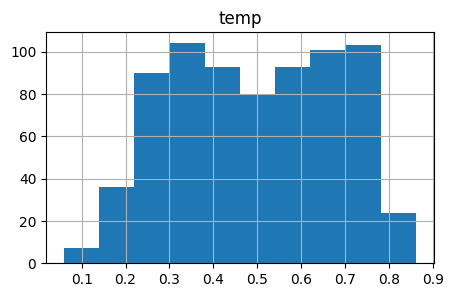

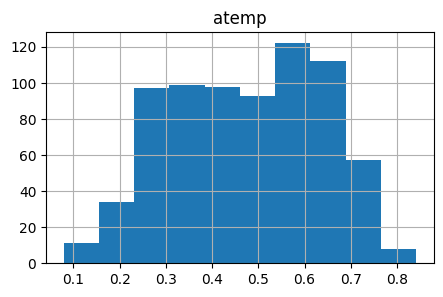

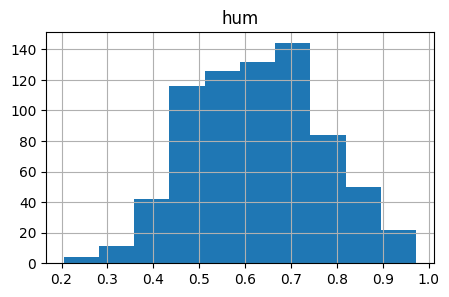

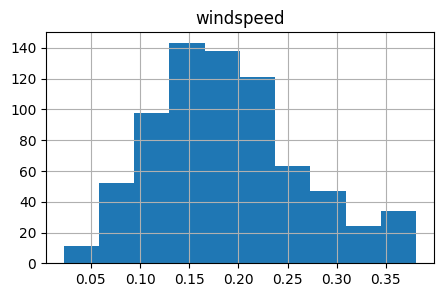

In [ ]:
bicycle_df_day.hist(column='temp', figsize=(5,3))
bicycle_df_day.hist(column='atemp', figsize=(5,3))
bicycle_df_day.hist(column='hum', figsize=(5,3))
bicycle_df_day.hist(column='windspeed', figsize=(5,3))

Kita mengelompokkan jumlah user untuk setiap musim menggunakan `groupby` dan diurutkan dari yang terbesar.

In [ ]:
total_users_per_season = bicycle_df_day.groupby('season')[['casual', 'registered']].sum()

total_users_per_season

,casual,registered
season,,
fall,226091,835038
springer,60622,410726
summer,203522,715067
winter,129782,711831


Kita mengelompokkan jumlah user berdasarkan hari menggunakan `groupby` dan diurutkan sesuai harinya memakai `sortindex`.

In [ ]:
total_users_per_weekday = bicycle_df_day.groupby('weekday')[['casual', 'registered']].sum()

total_users_per_weekday = total_users_per_weekday.sort_index()

total_users_per_weekday

,casual,registered
weekday,,
Monday,140521,303506
Tuesday,70784,384719
Wednesday,57843,411266
Thursday,57319,415729
Friday,61460,423935
Saturday,78238,409552
Sunday,153852,323955


Kita mengelompokkan jumlah user berdasarkan bulan menggunakan `groupby` dan diurutkan sesuai bulannya memakai `sortindex`.

In [ ]:
total_users_per_month = bicycle_df_day.groupby(['yr','mnth'])[['casual', 'registered']].sum()

total_users_per_month = total_users_per_month.sort_index()

total_users_per_month

casual  registered
yr   mnth                    
2011 Jan     3073       35116
     Feb     6242       41973
     Mar    12826       51219
     Apr    22346       72524
     May    31050      104771
     Jun    30612      112900
     Jul    36452      104889
     Aug    28842      107849
     Sep    26545      100873
     Oct    25222       98289
     Nov    15594       86573
     Dec     8448       78875
2012 Jan     8969       87775
     Feb     8721       94416
     Mar    31618      133257
     Apr    38456      135768
     May    44235      151630
     Jun    43294      159536
     Jul    41705      161902
     Aug    43197      171306
     Sep    43778      174795
     Oct    34538      164303
     Nov    21009      131655
     Dec    13245      110468

Kita mengelompokkan jumlah user untuk setiap cuaca menggunakan `groupby` dan diurutkan dari yang terbesar.

In [ ]:
weather_users = bicycle_df_day.groupby('weathersit')[['casual', 'registered']].sum()

weather_users

,casual,registered
weathersit,,
Bad Weather,3895,33974
Good Weather,446346,1811606
Misty,169776,827082


### Explore `bicycle_df_hour`

In [ ]:
bicycle_df_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16336,16337,2012-11-18,winter,2012,Nov,10,Not Holiday,Monday,Weekend/Holiday,Good Weather,0.34,0.3030,0.66,0.2985,79,250,329
4066,4067,2011-06-23,fall,2011,Jun,8,Not Holiday,Friday,Working Day,Misty,0.74,0.6970,0.70,0.1940,20,412,432
14074,14075,2012-08-14,fall,2012,Aug,15,Not Holiday,Wednesday,Working Day,Good Weather,0.82,0.7576,0.46,0.2239,84,199,283
13886,13887,2012-08-06,fall,2012,Aug,19,Not Holiday,Tuesday,Working Day,Good Weather,0.78,0.7424,0.59,0.1940,109,531,640
9675,9676,2012-02-13,springer,2012,Feb,2,Not Holiday,Tuesday,Working Day,Good Weather,0.14,0.1364,0.46,0.1940,0,4,4


In [ ]:
bicycle_df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,May,NaN,Not Holiday,Sunday,Working Day,Good Weather,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627267,0.188691,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.030000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.477500,367.000000,886.000000,977.000000


Kita coba periksa apakah ID data (atau instant) memiliki nilai unik.

In [ ]:
bicycle_df_hour.instant.is_unique

True

Kita coba periksa distribusi nilai data kontinu menggunakan histogram.

array([[<Axes: title={'center': 'windspeed'}>]], dtype=object)

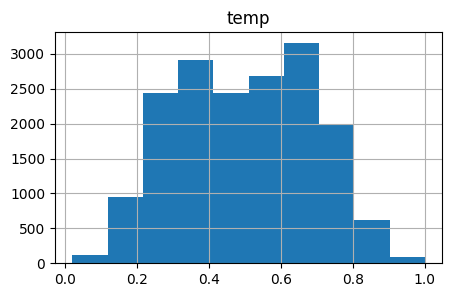

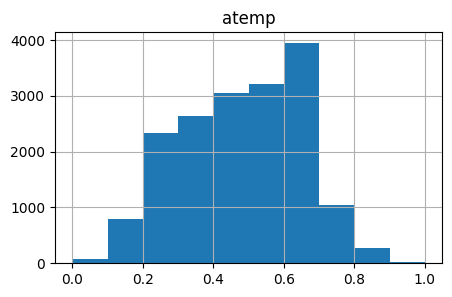

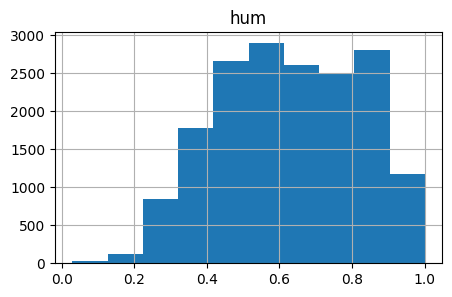

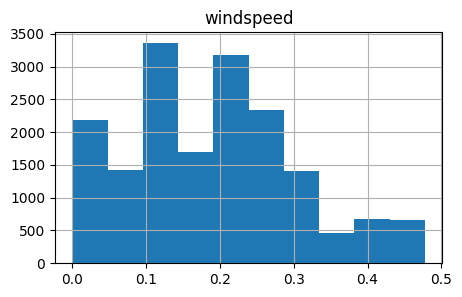

In [ ]:
bicycle_df_hour.hist(column='temp', figsize=(5,3))
bicycle_df_hour.hist(column='atemp', figsize=(5,3))
bicycle_df_hour.hist(column='hum', figsize=(5,3))
bicycle_df_hour.hist(column='windspeed', figsize=(5,3))

Kita mengelompokkan jumlah user untuk setiap musim menggunakan `groupby` dan diurutkan dari yang terbesar.

In [ ]:
total_users_per_season = bicycle_df_hour.groupby('season')[['casual', 'registered']].sum()

total_users_per_season

,casual,registered
season,,
fall,226091,835038
springer,60622,410726
summer,203522,715067
winter,129782,711831


Kita mengelompokkan jumlah user berdasarkan hari menggunakan `groupby` dan diurutkan sesuai harinya memakai `sortindex`.

In [ ]:
total_users_per_weekday = bicycle_df_hour.groupby('weekday')[['casual', 'registered']].sum()

total_users_per_weekday = total_users_per_weekday.sort_index()

total_users_per_weekday

,casual,registered
weekday,,
Monday,140521,303506
Tuesday,70784,384719
Wednesday,57843,411266
Thursday,57319,415729
Friday,61460,423935
Saturday,78238,409552
Sunday,153852,323955


Kita mengelompokkan jumlah user berdasarkan bulan menggunakan `groupby` dan diurutkan sesuai bulannya memakai `sortindex`.

In [ ]:
total_users_per_month = bicycle_df_hour.groupby(['yr','mnth'])[['casual', 'registered']].sum()

total_users_per_month = total_users_per_month.sort_index()

total_users_per_month

casual  registered
yr   mnth                    
2011 Jan     3073       35116
     Feb     6242       41973
     Mar    12826       51219
     Apr    22346       72524
     May    31050      104771
     Jun    30612      112900
     Jul    36452      104889
     Aug    28842      107849
     Sep    26545      100873
     Oct    25222       98289
     Nov    15594       86573
     Dec     8448       78875
2012 Jan     8969       87775
     Feb     8721       94416
     Mar    31618      133257
     Apr    38456      135768
     May    44235      151630
     Jun    43294      159536
     Jul    41705      161902
     Aug    43197      171306
     Sep    43778      174795
     Oct    34538      164303
     Nov    21009      131655
     Dec    13245      110468

Kita mengelompokkan jumlah user untuk setiap cuaca menggunakan `groupby` dan diurutkan dari yang terbesar.

In [ ]:
weather_users = bicycle_df_hour.groupby('weathersit')[['casual', 'registered']].sum()

weather_users

,casual,registered
weathersit,,
Bad Weather,22783,135548
Extreme Weather,8,215
Good Weather,462745,1875428
Misty,134481,661471


Kita mengelompokkan jumlah user untuk setiap jam menggunakan `groupby` dan diurutkan berdasarkan jam.

In [ ]:
hourly_users = bicycle_df_hour.groupby('hr')[['casual', 'registered']].sum().sort_values(by='hr', ascending=True)

hourly_users = hourly_users.sort_index()

hourly_users

,casual,registered
hr,,
0,7375,31755
1,4709,19455
2,3412,12940
3,1893,6281
4,874,3554
5,1012,13249
6,3017,52115
7,8037,146134
8,15761,245240


**Insight:**
- Kebanyakan user menggunakan bike sharing saat cuaca bagus
- Penggunaan bike sharing saat cuaca ekstrem hanya pada data hourly.
- Selain itu, nilai agregat user untuk analisis pada data per hari dan data per jam sangat mirip, sehingga untuk visualisasi hanya akan digunakan salah satu data saja.
- Distribusi data kontinu memiliki sedikit perbedaan, misalnya windspeed pada hourly data mencapai rentang 0.5 karena maksimalnya 0.478, sedangkan pada daily data hanya mencapai 0.35 karena maksimalnya sekitar 0.38.

## Visualization & Explanatory Analysis

Proses ini akan menjawab pertanyaan bisnis yang sudah ditetapkan di awal. Kita akan menggunakan data `bicycle_df_day` untuk melihat visualisasi pengguna setiap bulan dan musim

### Pertanyaan 1: Pada bulan apa banyak pengguna casual dan register mencapai puncaknya?

Karena analisis memanfaatkan tren waktu, chart yang digunakan adalah line chart. Garis oranye menggambarkan registered users, sedangkan garis biru menggambarkan casual user. Untuk mempermudah pemetaan line chart kita akan mengekstrak data bulan dari atribut "dteday".

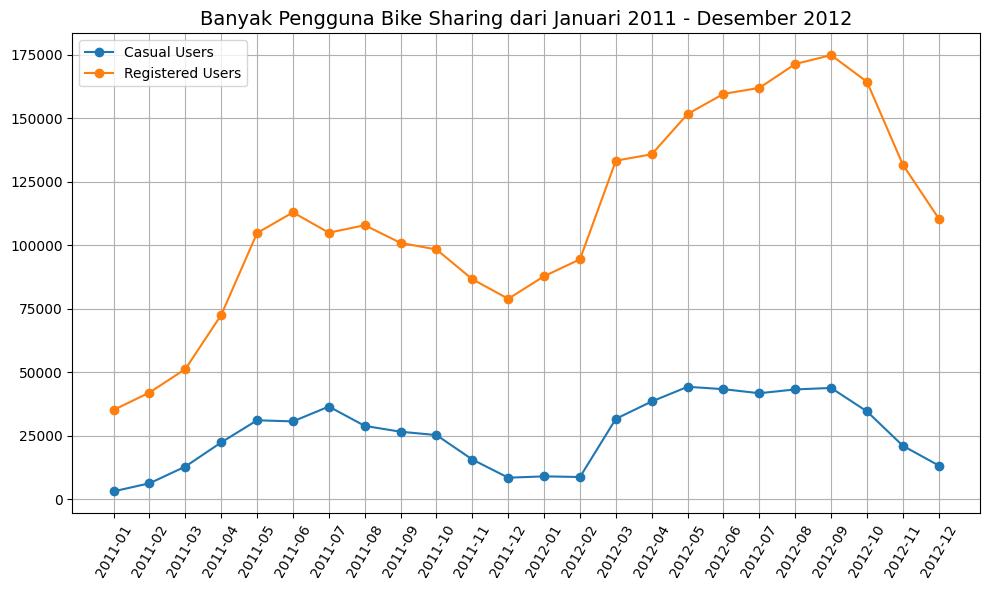

In [ ]:
bicycle_df_day['year_month'] = bicycle_df_day['dteday'].dt.to_period('M')

monthly_users = bicycle_df_day.groupby('year_month')[['casual', 'registered']].sum().reset_index()

monthly_users['year_month'] = monthly_users['year_month'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(monthly_users['year_month'], monthly_users['casual'], label='Casual Users', marker='o')
plt.plot(monthly_users['year_month'], monthly_users['registered'], label='Registered Users', marker='o')

plt.title('Banyak Pengguna Bike Sharing dari Januari 2011 - Desember 2012', fontsize=14)
plt.xticks(rotation=60)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Pada musim apa banyak pengguna casual dan register mencapai puncaknya?

Analisis memanfaatkan perbandingan untuk mencari musim apa yang memiliki pengguna terbanyak. Skala y dalam ratusan ribuan. Bar biru menggambarkan casual user, bar oranye menggambarkan registered user

<Figure size 1000x600 with 0 Axes>

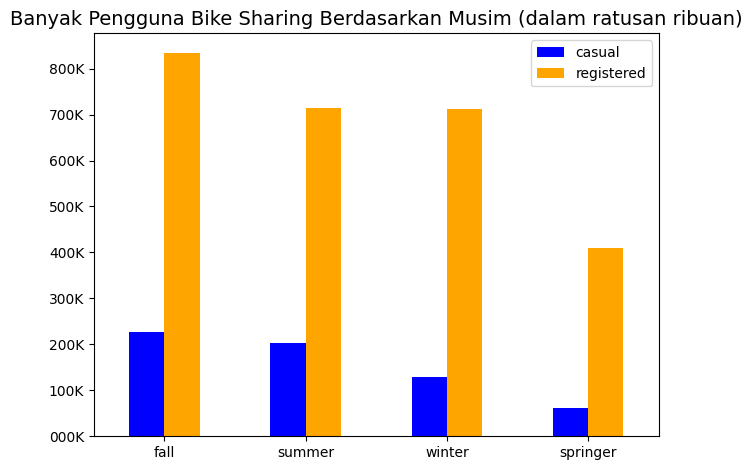

In [ ]:
from matplotlib.ticker import FuncFormatter
# Lakukan formatting untuk memudahkan pemahaman label y
def thousands_formatter(x, pos):
    return f'{int(x/100000)}00K'

total_users_per_season = bicycle_df_day.groupby('season')[['casual', 'registered']].sum().sort_values(by="registered", ascending=False)

plt.figure(figsize=(10, 6))
total_users_per_season.plot(kind='bar', stacked=False, color=['blue', 'orange'])

plt.title('Banyak Pengguna Bike Sharing Berdasarkan Musim (dalam ratusan ribuan)', fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight:**

- Banyak pengguna registered mencapai puncaknya pada September 2012, sekitar 175000. Banyak pengguna casual mencapai puncaknya pada Mei 2012, sekitar 40000.
- Banyak pengguna, registered maupun casual, selalu meningkat di awal tahun dan selalu menurun di akhir tahun.
- Musim gugur memiliki pengguna registered (>800 ribu) dan pengguna casual (>200 ribu) terbanyak dibandingkan musim lain.

## Analisis Lanjutan (Opsional)

### Bagaimana pengelompokkan berdasarkan banyak total pengguna per hari?

Analisis pengelompokan akan menggunakan teknik binning, di mana sebuah bin dibagi-bagi menjadi 2000 user interval. Dari EDA diperoleh bahwa minimum total pengguna sekitar 22 dan maksimumnya sekitar 8700 sehingga sangat ideal untuk membaginya menjadi interval per 2000 user. Label y menunjukkan berapa hari yang memiliki banyak user dalam interval tersebut. Proses ini memanfaatkan `pd.cut()` untuk melakukan binning.

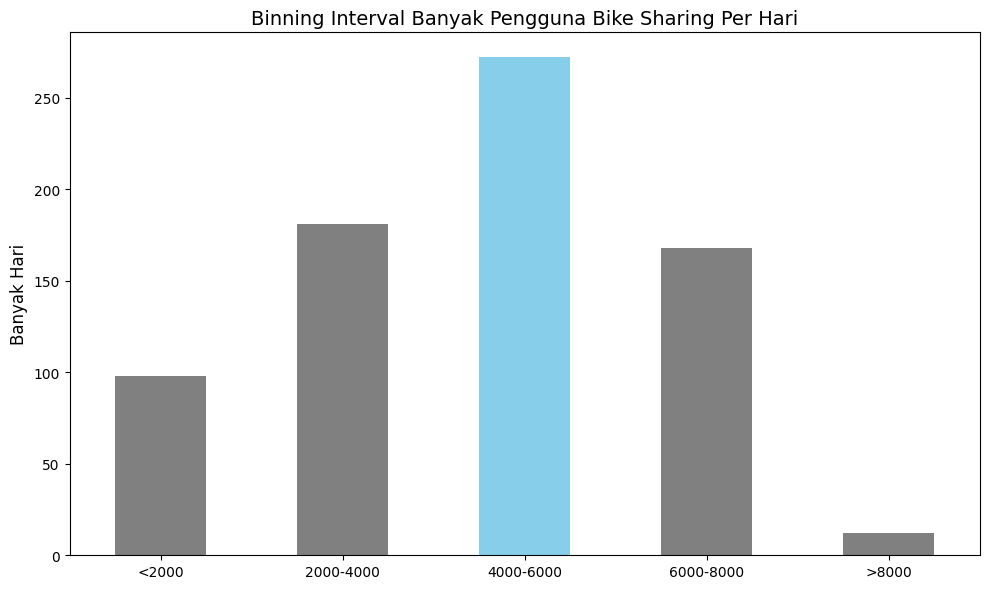

In [ ]:
bins = [0, 2000, 4000, 6000, 8000, float('inf')]
labels = ['<2000', '2000-4000', '4000-6000', '6000-8000', '>8000']

bicycle_df_day['cnt_group'] = pd.cut(bicycle_df_day['cnt'], bins=bins, labels=labels, right=False)

user_group_counts = bicycle_df_day['cnt_group'].value_counts().sort_index()

# Highlight interval terbanyak
max_index = user_group_counts.idxmax()
colors = ['skyblue' if idx == max_index else 'grey' for idx in user_group_counts.index]

plt.figure(figsize=(10, 6))
user_group_counts.plot(kind='bar', color=colors)

plt.title('Binning Interval Banyak Pengguna Bike Sharing Per Hari', fontsize=14)
plt.xlabel('')
plt.ylabel('Banyak Hari', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight:**
- Hari-hari di mana terdapat 4000-6000 pengguna bike sharing (registered + casual) per hari lebih sering terjadi.

## Conclusion

- Banyak pengguna registered mencapai puncaknya pada September 2012, sekitar 175000. Banyak pengguna casual mencapai puncaknya pada Mei 2012, sekitar 40000.
- Musim gugur memiliki pengguna registered (>800 ribu) dan pengguna casual (>200 ribu) terbanyak dibandingkan musim lain.
- Hari-hari di mana terdapat 4000-6000 pengguna bike sharing (registered + casual) per hari lebih sering terjadi.